## Combining Pandas and Text Analysis

We have learned how to work with numbers in the Python package pandas, and how to work with text in Python using built in Python packages, and later the NLTK package. To operationalize concepts and analyze the numbers, we can combine these two packages together.

### Learning Goals

* Begin to think about how we can quantify text to use the output in further analyses, or to visualize the output
* Learn how to add text analysis techniques to a pandas dataframe
* Learn a few more visualization techniques
* Learn a number of new pandas functions:
    * the pandas apply function
    * the pandas tolist function
    * the pandas lambda function
* Learn a new built-in function, the .join() function

### Outline

* Text as a column in a pandas df
* Descriptive statistics and visualization
* The str attribute
* The apply function
* The lambda function
* Extracting text
* Exercise: average TTR

### Key Terms
* *categorical variable*
    * is a variable that can take on one of a limited, and usually fixed, number of possible values
* *lambda function*
    * syntax that allows us to write and apply our own function in a pandas dataframe
* *x-axis*
    * the horizontal axis of a graph
* *y-axis*
    * the vertical axis of a graph
* *error bars*
    * a graphical representation of the variability of data and are used on graphs to indicate the error, or uncertainty in a reported measurement. They give a general idea of how precise a measurement is, or conversely, how far from the reported value the true (error free) value might be.
* *standard deviation*
    * a measure that is used to quantify the amount of variation or dispersion of a set of data values
* *join function*
    * ''.join(), joins the elements in a list into one string

### 0. Create a DF from a .csv file

We have seen texts in the form of raw text. Today we'll deal with text that is in the form of a .csv file. We can read it into Python in the same way we read in the numerical dataset from the National Survey of Family Growth. 

**Data preparation**

I created a .csv file from a collection of 19th century children's literature. The data were compiled by students in this course: http://english197s2015.pbworks.com/w/page/93127947/FrontPage

The raw data are found here: http://dhresourcesforprojectbuilding.pbworks.com/w/page/69244469/Data%20Collections%20and%20Datasets#demo-corpora

That page has additional corpora, so search through it to see if anything sparks your interest.

I did some minimal cleaning to get the children's literature data in .csv format for our use. The delimiter for this file is a tab, so technically it's a tab separated file, or tsv. We can specify that delimiter with the option "sep = '\t'"

In [1]:
import pandas
import nltk
import string
import matplotlib.pyplot as plt #note this last import statement. Why might we use "import as"?

#read in our data
df = pandas.read_csv("../data/childrens_lit.csv.bz2", sep = '\t', encoding = 'utf-8', compression = 'bz2', index_col=0)
df

,title,author gender,year,text
0,A Dog with a Bad Name,Male,1886,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...
1,A Final Reckoning,Male,1887,A Final Reckoning: A Tale of Bush Life in Aust...
2,"A House Party, Don Gesualdo, and A Rainy June",Female,1887,A HOUSE-PARTY Don Gesualdo and A Rainy June...
3,A Houseful of Girls,Female,1889,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ..."
4,A Little Country Girl,Female,1885,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ..."
5,A Round Dozen,Female,1883,\n A ROUND DOZEN. [Illustration: TOINETTE AND...
6,A Sailor's Lass,Female,1886,"A SAILOR'S LASS by EMMA LESLIE, Author of ""..."
7,A World of Girls,Female,1886,A WORLD OF GIRLS: THE STORY OF A SCHOOL. By ...
8,Adrift in the Wild,Male,1887,Adrift in the Wilds; ...
9,Adventures in Africa,Male,1883,"ADVENTURES IN AFRICA, BY W.H.G. KINGSTON. C..."


Notice this is a typical dataframe, possibly with more columns as strings than numbers. The text in contained in the column 'text'.

Notice also there are missing texts. For now, we will drop these texts so we can move forward with text analysis. In your own work, you should justify dropping missing texts when possible.

In [2]:
df = df.dropna(subset=["text"])
df

,title,author gender,year,text
0,A Dog with a Bad Name,Male,1886,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...
1,A Final Reckoning,Male,1887,A Final Reckoning: A Tale of Bush Life in Aust...
2,"A House Party, Don Gesualdo, and A Rainy June",Female,1887,A HOUSE-PARTY Don Gesualdo and A Rainy June...
3,A Houseful of Girls,Female,1889,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ..."
4,A Little Country Girl,Female,1885,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ..."
5,A Round Dozen,Female,1883,\n A ROUND DOZEN. [Illustration: TOINETTE AND...
6,A Sailor's Lass,Female,1886,"A SAILOR'S LASS by EMMA LESLIE, Author of ""..."
7,A World of Girls,Female,1886,A WORLD OF GIRLS: THE STORY OF A SCHOOL. By ...
8,Adrift in the Wild,Male,1887,Adrift in the Wilds; ...
9,Adventures in Africa,Male,1883,"ADVENTURES IN AFRICA, BY W.H.G. KINGSTON. C..."


In [3]:
##Ex: Print the first text in the dataframe (starts with "A DOG WITH A BAD NAME"). 
###Hint: Remind yourself about the syntax for slicing a dataframe

print(df.iloc[0, 3])

A DOG WITH A BAD NAME  BY TALBOT BAINES REED    CHAPTER ONE.  DRY-ROT.  Bolsover College was in a bad temper.  It often was; for as a rule it had little else to do; and what it had, was usually a less congenial occupation.  Bolsover, in fact, was a school which sadly needed two trifling reforms before it could be expected to do much good in the world.  One was, that all its masters should be dismissed; the other was, that all its boys should be expelled.  When these little changes had been effected there was every chance of turning the place into a creditable school; but not much chance otherwise.  For Bolsover College was afflicted with dry-rot.  The mischief had begun not last term or the term before.  Years ago it had begun to eat into the place, and every year it grew more incurable.  Occasional efforts had been made to patch things up.  A boy had been now and then expelled. A master had now and then "resigned."  An old rule had now and then been enforced.  A new rule was now and t

### 1. Descriptive Statistics and Visualization

The first thing we probably want to do is describe our data, to make sure everything is in order. We can use the describe function for the numerical data, and the value_counts function for categorical data.

In [4]:
print(df.describe()) #get descriptive statistics for all numerical columns
print()
print(df['author gender'].value_counts()) #frequency counts for categorical data
print()
print(df['year'].value_counts()) #treat year as a categorical variable
print()
print(df['year'].mode()) #find the year in which the most novels were published

              year
count   127.000000
mean   1885.110236
std       2.752281
min    1880.000000
25%    1883.000000
50%    1886.000000
75%    1887.000000
max    1889.000000

Male      99
Female    28
Name: author gender, dtype: int64

1883    19
1886    18
1889    17
1887    16
1888    13
1885    12
1882    10
1880     8
1884     7
1881     7
Name: year, dtype: int64

0    1883
dtype: int64


We can do a few things by just using the metadata already present.

For example, we can use the groupby and the count() function to graph the number of books by male and female authors. This is similar to the value_counts() function, but allows us to plot the output.

In [7]:
#creat a pandas object that is a groupby dataframe, grouped on author gender
grouped_gender = df.groupby("author gender")
print(grouped_gender['text'].count())

author gender
Female    28
Male      99
Name: text, dtype: int64


Let's graph the number of texts by gender of author.

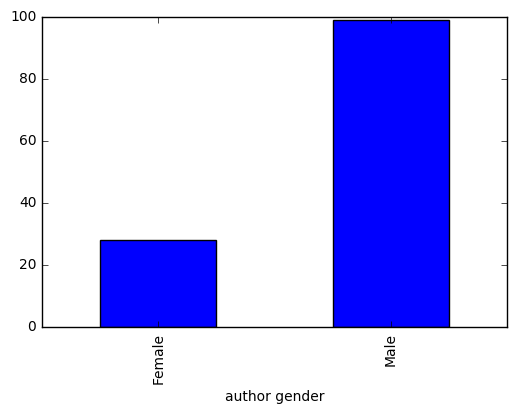

In [6]:
grouped_gender['text'].count().plot(kind = 'bar')
plt.show()

In [8]:
#Ex: Create a variable called 'grouped_year' that groups the dataframe by year.
## Print the number of texts per year.

grouped_year = df.groupby('year')
grouped_year['text'].count()

year
1880     8
1881     7
1882    10
1883    19
1884     7
1885    12
1886    18
1887    16
1888    13
1889    17
Name: text, dtype: int64

We can graph this via a line graph.

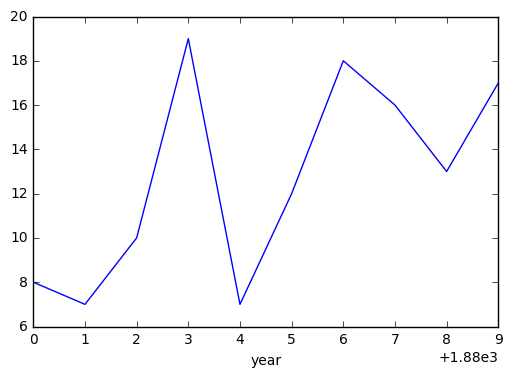

In [9]:
grouped_year['text'].count().plot(kind = 'line')
plt.show()

Oops! That doesn't look right! Python automatically converted the year to scientific notation. We can set that option to False.

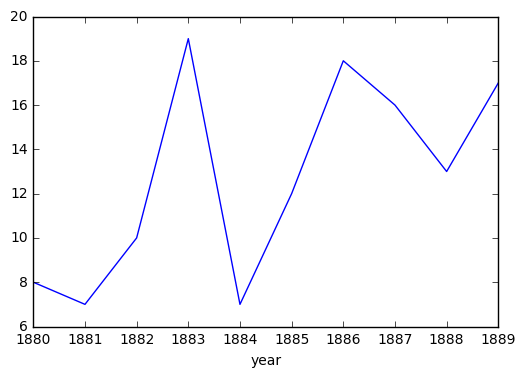

In [10]:
plt.ticklabel_format(useOffset=False) #forces Python to not convert numbers
grouped_year['text'].count().plot(kind = 'line')
plt.show()

We haven't done any text analysis yet. Let's apply some of our text analysis techniques to the text, add columns with the output, and analyze/visualize the output.

### 2. The str attribute

Luckily for us, pandas has an attribute called 'str' which allows us to access Python's built-in string functions.

For example, we can make the text lowercase, and assign this to a new column.

In [11]:
df['text_lc'] = df['text'].str.lower()
df

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,title,author gender,year,text,text_lc
0,A Dog with a Bad Name,Male,1886,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...,a dog with a bad name by talbot baines reed ...
1,A Final Reckoning,Male,1887,A Final Reckoning: A Tale of Bush Life in Aust...,a final reckoning: a tale of bush life in aust...
2,"A House Party, Don Gesualdo, and A Rainy June",Female,1887,A HOUSE-PARTY Don Gesualdo and A Rainy June...,a house-party don gesualdo and a rainy june...
3,A Houseful of Girls,Female,1889,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ...","a houseful of girls. by sarah tytler, author ..."
4,A Little Country Girl,Female,1885,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ...","little country girl. by susan coolidge, ..."
5,A Round Dozen,Female,1883,\n A ROUND DOZEN. [Illustration: TOINETTE AND...,\n a round dozen. [illustration: toinette and...
6,A Sailor's Lass,Female,1886,"A SAILOR'S LASS by EMMA LESLIE, Author of ""...","a sailor's lass by emma leslie, author of ""..."
7,A World of Girls,Female,1886,A WORLD OF GIRLS: THE STORY OF A SCHOOL. By ...,a world of girls: the story of a school. by ...
8,Adrift in the Wild,Male,1887,Adrift in the Wilds; ...,adrift in the wilds; ...
9,Adventures in Africa,Male,1883,"ADVENTURES IN AFRICA, BY W.H.G. KINGSTON. C...","adventures in africa, by w.h.g. kingston. c..."


In [12]:
##Ex: create a new column, 'text_split', that contains the lower case text split into list. 
####HINT: split on white space, don't tokenize it.

df['text_split'] = df['text_lc'].str.split()
df

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,title,author gender,year,text,text_lc,text_split
0,A Dog with a Bad Name,Male,1886,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...,a dog with a bad name by talbot baines reed ...,"[a, dog, with, a, bad, name, by, talbot, baine..."
1,A Final Reckoning,Male,1887,A Final Reckoning: A Tale of Bush Life in Aust...,a final reckoning: a tale of bush life in aust...,"[a, final, reckoning:, a, tale, of, bush, life..."
2,"A House Party, Don Gesualdo, and A Rainy June",Female,1887,A HOUSE-PARTY Don Gesualdo and A Rainy June...,a house-party don gesualdo and a rainy june...,"[a, house-party, don, gesualdo, and, a, rainy,..."
3,A Houseful of Girls,Female,1889,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ...","a houseful of girls. by sarah tytler, author ...","[a, houseful, of, girls., by, sarah, tytler,, ..."
4,A Little Country Girl,Female,1885,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ...","little country girl. by susan coolidge, ...","[little, country, girl., by, susan, coolidge,,..."
5,A Round Dozen,Female,1883,\n A ROUND DOZEN. [Illustration: TOINETTE AND...,\n a round dozen. [illustration: toinette and...,"[a, round, dozen., [illustration:, toinette, a..."
6,A Sailor's Lass,Female,1886,"A SAILOR'S LASS by EMMA LESLIE, Author of ""...","a sailor's lass by emma leslie, author of ""...","[a, sailor's, lass, by, emma, leslie,, author,..."
7,A World of Girls,Female,1886,A WORLD OF GIRLS: THE STORY OF A SCHOOL. By ...,a world of girls: the story of a school. by ...,"[a, world, of, girls:, the, story, of, a, scho..."
8,Adrift in the Wild,Male,1887,Adrift in the Wilds; ...,adrift in the wilds; ...,"[adrift, in, the, wilds;, or,, the, adventures..."
9,Adventures in Africa,Male,1883,"ADVENTURES IN AFRICA, BY W.H.G. KINGSTON. C...","adventures in africa, by w.h.g. kingston. c...","[adventures, in, africa,, by, w.h.g., kingston..."


### 3. The apply function

We can also apply a function to each row. To get a word count of a text file we would take the length of the split string like this:

```len(text_split)```

If we want to do this on every row in our dataframe, we can use the apply() function.

In [13]:
df['word_count'] = df['text_split'].apply(len)
df

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,title,author gender,year,text,text_lc,text_split,word_count
0,A Dog with a Bad Name,Male,1886,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...,a dog with a bad name by talbot baines reed ...,"[a, dog, with, a, bad, name, by, talbot, baine...",96493
1,A Final Reckoning,Male,1887,A Final Reckoning: A Tale of Bush Life in Aust...,a final reckoning: a tale of bush life in aust...,"[a, final, reckoning:, a, tale, of, bush, life...",100603
2,"A House Party, Don Gesualdo, and A Rainy June",Female,1887,A HOUSE-PARTY Don Gesualdo and A Rainy June...,a house-party don gesualdo and a rainy june...,"[a, house-party, don, gesualdo, and, a, rainy,...",85132
3,A Houseful of Girls,Female,1889,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ...","a houseful of girls. by sarah tytler, author ...","[a, houseful, of, girls., by, sarah, tytler,, ...",92822
4,A Little Country Girl,Female,1885,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ...","little country girl. by susan coolidge, ...","[little, country, girl., by, susan, coolidge,,...",48251
5,A Round Dozen,Female,1883,\n A ROUND DOZEN. [Illustration: TOINETTE AND...,\n a round dozen. [illustration: toinette and...,"[a, round, dozen., [illustration:, toinette, a...",47458
6,A Sailor's Lass,Female,1886,"A SAILOR'S LASS by EMMA LESLIE, Author of ""...","a sailor's lass by emma leslie, author of ""...","[a, sailor's, lass, by, emma, leslie,, author,...",22213
7,A World of Girls,Female,1886,A WORLD OF GIRLS: THE STORY OF A SCHOOL. By ...,a world of girls: the story of a school. by ...,"[a, world, of, girls:, the, story, of, a, scho...",81524
8,Adrift in the Wild,Male,1887,Adrift in the Wilds; ...,adrift in the wilds; ...,"[adrift, in, the, wilds;, or,, the, adventures...",62437
9,Adventures in Africa,Male,1883,"ADVENTURES IN AFRICA, BY W.H.G. KINGSTON. C...","adventures in africa, by w.h.g. kingston. c...","[adventures, in, africa,, by, w.h.g., kingston...",36261


What is the average length of each novel in our data? With pandas, this is easy!

In [16]:
df['word_count'].mean()

77718.685039370073

(These are long novels!) We can also group and slice our dataframe to do further analyses.

author gender
Female    55780.964286
Male      83923.292929
Name: word_count, dtype: float64


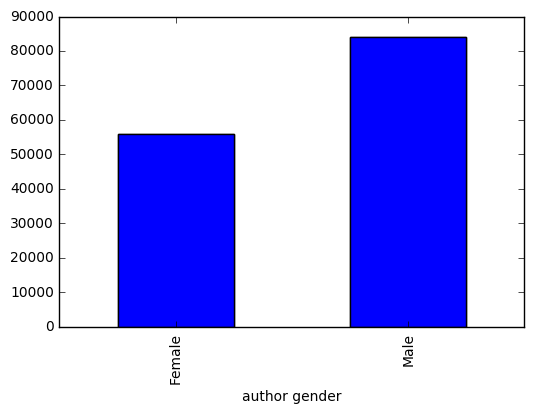

In [19]:
###Ex: print the average novel length for male authors and female authors.
###### What conclusions might you draw from this?

###Ex: graph the average novel length by gender

grouped_gender = df.groupby('author gender')
print(grouped_gender['word_count'].mean())
grouped_gender['word_count'].mean().plot(kind='bar')
plt.show()

What if we want to put error bars on this? We can add a 'yerr' option to our graph, and use the std() calculation to add error bars.

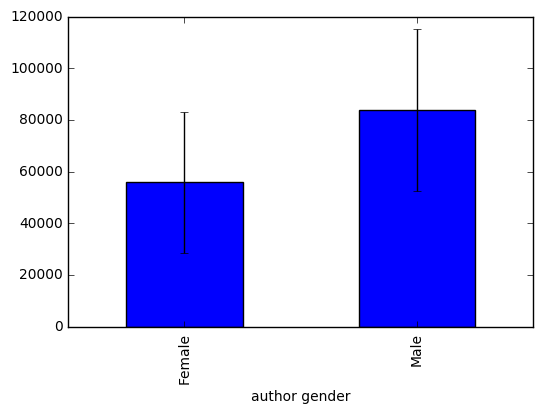

In [20]:
grouped_gender = df.groupby('author gender')
grouped_gender['word_count'].mean().plot(kind = 'bar', yerr = grouped_gender['word_count'].std())
plt.show()

###### Gold star exercise

This one is a bit tricky. If you're not quite there, no worries! We'll work through it together.

**Ex: plot the average novel length by year, with error bars. Your x-axis should be year, and your y-axis number of words.**

HINT: Copy and paste what we did above with gender, and then change the necessary variables and options. By my count, you should only have to change one variable, and one graph option.


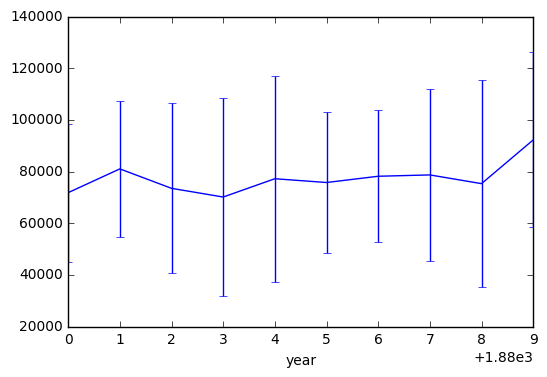

In [21]:
#Write your exercise solution here

grouped_year = df.groupby('year')
grouped_year['word_count'].mean().plot(kind = 'line', yerr = grouped_year['word_count'].std())
plt.show()

### 4. The lambda function

If we wanted to use nltk or list comprehension on the split text, we have to introduce one more Python trick: the lambda function. This simply allows us to write our own function to apply to each row in our dataframe. For example, we may want tokenize our text instead of splitting on the white space. To do this we can use the lambda function.

Because of the length of the novels tokenizing the text takes a bit of time. We'll instead tokenize the title only.

In [25]:
df['tokens_new'] = df['title'].apply(nltk.word_tokenize)
#df['tokens'] = df['title'].apply(lambda x: nltk.word_tokenize(x))
df[['tokens_new','tokens']]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,tokens_new,tokens
0,"[A, Dog, with, a, Bad, Name]","[A, Dog, with, a, Bad, Name]"
1,"[A, Final, Reckoning]","[A, Final, Reckoning]"
2,"[A, House, Party, ,, Don, Gesualdo, ,, and, A,...","[A, House, Party, ,, Don, Gesualdo, ,, and, A,..."
3,"[A, Houseful, of, Girls]","[A, Houseful, of, Girls]"
4,"[A, Little, Country, Girl]","[A, Little, Country, Girl]"
5,"[A, Round, Dozen]","[A, Round, Dozen]"
6,"[A, Sailor, 's, Lass]","[A, Sailor, 's, Lass]"
7,"[A, World, of, Girls]","[A, World, of, Girls]"
8,"[Adrift, in, the, Wild]","[Adrift, in, the, Wild]"
9,"[Adventures, in, Africa]","[Adventures, in, Africa]"


With this tokenized list we might want to, for example, remove punctuation. Again, we can use the lambda function, with list comprehension.

In [26]:
df['tokens_clean'] = df['tokens'].apply(lambda x: [word for word in x if word not in list(string.punctuation)])
df['tokens_clean']

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0                           [A, Dog, with, a, Bad, Name]
1                                  [A, Final, Reckoning]
2      [A, House, Party, Don, Gesualdo, and, A, Rainy...
3                               [A, Houseful, of, Girls]
4                             [A, Little, Country, Girl]
5                                      [A, Round, Dozen]
6                                  [A, Sailor, 's, Lass]
7                                  [A, World, of, Girls]
8                                [Adrift, in, the, Wild]
9                               [Adventures, in, Africa]
10                           [Adventures, in, Australia]
11                                         [All, Adrift]
12                             [Battles, With, the, Sea]
13                       [Bimbi, Stories, for, Children]
14     [Blown, To, Bits, Or, The, Lonely, Man, of, Ra...
15            [Blue, Lights, Hot, Work, In, the, Soudan]
16                             [Bonnie, Prince, Charlie]
17                             

### 5. Extracting Text from a Dataframe

We may want to extract the text from our dataframe, to do further analyses on the text only. We can do this using the tolist() function and the join() function.

In [27]:
novels = df['text'].tolist()
print(novels[:1])

['A DOG WITH A BAD NAME  BY TALBOT BAINES REED    CHAPTER ONE.  DRY-ROT.  Bolsover College was in a bad temper.  It often was; for as a rule it had little else to do; and what it had, was usually a less congenial occupation.  Bolsover, in fact, was a school which sadly needed two trifling reforms before it could be expected to do much good in the world.  One was, that all its masters should be dismissed; the other was, that all its boys should be expelled.  When these little changes had been effected there was every chance of turning the place into a creditable school; but not much chance otherwise.  For Bolsover College was afflicted with dry-rot.  The mischief had begun not last term or the term before.  Years ago it had begun to eat into the place, and every year it grew more incurable.  Occasional efforts had been made to patch things up.  A boy had been now and then expelled. A master had now and then "resigned."  An old rule had now and then been enforced.  A new rule was now and

In [28]:
#turn all of the novels into one long string
cat_novels = ''.join(n for n in novels)
print(cat_novels[:100])

A DOG WITH A BAD NAME  BY TALBOT BAINES REED    CHAPTER ONE.  DRY-ROT.  Bolsover College was in a ba


### 6. Excercise: Average TTR

**Motivating Question: Is there a difference in the average TTR for male and female authors?**

To answer this, go step by step.

For computational reasons we will use the list we created by splitting on white spaces rather than tokenized text. So this is approximate only.

We first need to count the token type in each novel. We can do this in two steps. First, create a column that contains a list of the unique token types, by applying the set function.

In [ ]:
##Ex: create a new column, 'text_type', which contains a list of unique token types

In [ ]:
##Ex: create a new column, 'type_count', which is a count of the token types in each novel.
##Ex: create a new column, 'ttr', which contains the type-token ratio for each novel.

In [ ]:
##Ex: Print the average ttr by author gender
##Ex: Graph this result with error bars